In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [6]:
readings = pd.read_pickle('measurements/readings_z.pkl')[4:] # exclude early movements/outliers

In [7]:
readings

,posX,posY,posZ,lidar0,lidar1,lidar2,lidar3,lidar4,lidar5,lidar6,lidar7,lidar8,joint0,joint1,joint2,joint3,joint4,joint5,joint6
4,0.5,0.5,0.09,8190,8190,1080,448,8191,8190,1376,8191,8191,0.327366,0.656164,0.245681,-1.539535,0.082891,2.161776,-0.033228
5,0.5,0.5,0.10,1306,165,1052,435,8191,8191,1431,8191,8190,0.433292,0.791733,0.334195,-1.538851,0.108387,2.241216,-0.033222
6,0.5,0.5,0.11,1206,8190,1043,421,8191,8190,8191,8191,8191,0.432813,0.787689,0.336014,-1.542448,0.108580,2.240832,-0.033218
7,0.5,0.5,0.12,8191,8190,1154,443,8191,8190,1396,8191,8191,0.432814,0.769468,0.337719,-1.546399,0.108645,2.233906,-0.033218
8,0.5,0.5,0.13,957,8190,1069,442,8191,8190,1492,8190,8190,0.432795,0.751960,0.339711,-1.549589,0.108727,2.225220,-0.033215
9,0.5,0.5,0.14,8190,8190,1281,449,8190,8190,1508,8191,8191,0.432567,0.735451,0.341637,-1.554481,0.108889,2.213955,-0.033215
10,0.5,0.5,0.15,8191,8191,1080,464,8190,8190,1480,8191,8191,0.432106,0.716251,0.343614,-1.558259,0.109022,2.205179,-0.033214
11,0.5,0.5,0.16,8191,8190,8191,463,8190,8191,1514,8191,8190,0.431586,0.699294,0.345483,-1.561031,0.109150,2.197253,-0.033216
12,0.5,0.5,0.17,8190,8190,1105,475,8191,8190,8191,8190,8191,0.431197,0.683500,0.347288,-1.563196,0.109381,2.186769,-0.033215
13,0.5,0.5,0.18,8190,8191,1261,484,8191,8190,1556,8191,8190,0.430478,0.664392,0.349350,-1.566121,0.109613,2.177038,-0.033212


In [8]:
# plot posZ x lidar3
# regression to compensate for vibration

In [36]:
lr = LinearRegression()
lr.fit(readings[['posZ']], readings[['lidar3']]) # note double brackets
print(lr.intercept_)
print(lr.coef_)

[351.32060435]
[[837.1938505]]


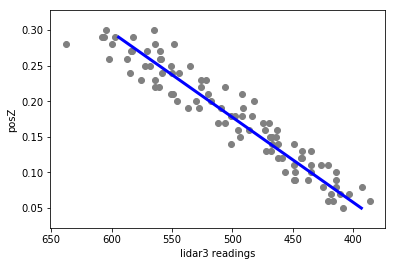

In [39]:
plt.scatter(readings['lidar3'], readings['posZ'], color='gray')
plt.ylabel('posZ')
plt.xlabel('lidar3 readings')

posZrange = np.arange(0.05,0.30, 0.01)
plt.plot(lr.predict(posZrange.reshape(-1,1)), posZrange, color='blue', linewidth=3)
plt.gca().invert_xaxis()

In [41]:
lr.coef_[0][0]*0.25 + lr.intercept_[0]

560.6190669729634